# url: https://chantastu.hatenablog.com/entry/2022/08/27/002920

# 【第7回】クラスタリング：k-means、階層的クラスタリング

## はじめに
scikit-learnはPythonのオープンソース機械学習ライブラリです。サポートベクターマシン、ランダムフォレスト、k近傍法、などを含む様々な分類、回帰、クラスタリングアルゴリズムを備えており、Pythonの数値計算ライブラリのNumPyとSciPyとやり取りするよう設計されています。

　機械学習には正解データがある教師あり学習と正解データがない教師なし学習があります。教師なし学習は正解データがない状態で学習させる手法になっています。教師なし学習にクラスタリングや次元削減があります。クラスタリングは、ある基準を設定してデータ間の類似性を計算し、データをグループ（クラスタ）にまとめることを言います。正解データがないので、どのようなグループになっているかの解釈は分析に委ねられます。クラスタリングには主にk-meansや階層的クラスタリングといった手法があります。



## 1. k-means
k-meansは①各データにランダムに割り当てたクラスタのラベルを用いて、各クラスタのデータの中心をクラスタの中心とし、②各データに対して最も近いクラスタの中心のクラスタに変更し、③再度クラスタの中心を計算して、②、③を繰り返していき、クラスタに変更（またはクラスタの中心に変更）がなくなるまで実施します。

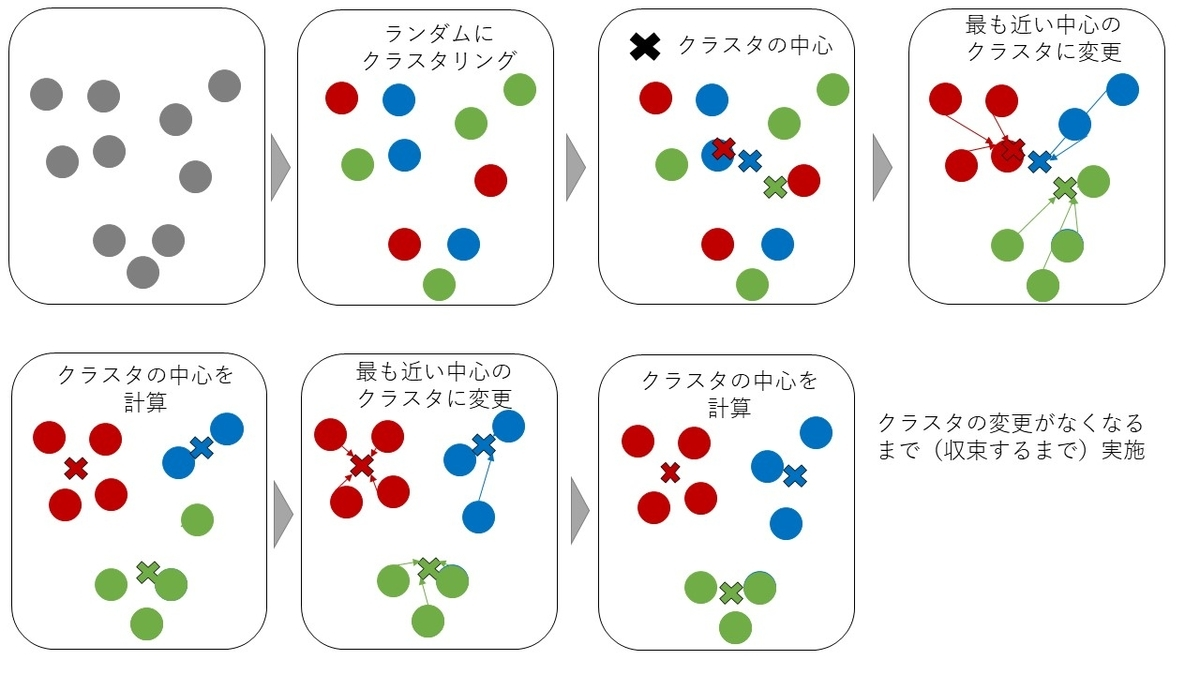

それではコードを見ていきましょう。k-meansではsklearn.cluster.KMeansを使用します。

以下の例では、3種類のワインの学習データセットを用います。今回はその内の説明変数の2つを使用します。KMeansの引数であるn_clustersは形成するクラスターの数、initはクラスターの中心の選択方法を意味しています。

url: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 2 0 2 0 2 0 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 1 2 2 1 2 2 2 2 0
 1 1 2 2 2 2 2 1 1 1 2 0 0 0 2 2 2 2 0 2 1 1 1 2 1 0 0 1 1 1 1 1 0 0 1 0 0
 1 0 1 1 2 1 2 0 0 1 2 2 0 1 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 0]


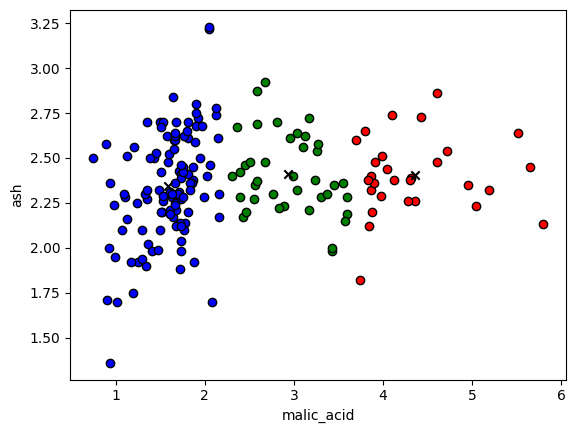

In [1]:
## 必要なライブラリーのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#データセットのためのライブラリ
from sklearn.datasets import load_wine
#k-meansのためのライブラリ
from sklearn.cluster import KMeans

# データセットの読み込み
wine = load_wine()

X = wine.data[:,[1,2]]

#クラスタリングを実行
km = KMeans(n_clusters=3 ,init='random')
y_km = km.fit_predict(X)
print(y_km)

#クラスタ番号0の散布図
plt.scatter(X[y_km == 0,0], X[y_km == 0,1], c = 'r', edgecolor = 'k', label = '1')

#クラスタ番号0の中心
plt.scatter(np.mean(X[y_km == 0,0]), np.mean(X[y_km == 0,1]), c = 'k', marker = 'x')

#クラスタ番号1の散布図
plt.scatter(X[y_km == 1,0], X[y_km == 1,1], c = 'g', edgecolor = 'k', label = '2')

#クラスタ番号1の中心
plt.scatter(np.mean(X[y_km == 1,0]), np.mean(X[y_km == 1,1]), c = 'k', marker = 'x')

#クラスタ番号2の散布図
plt.scatter(X[y_km == 2,0], X[y_km == 2,1], c='b', edgecolor = 'k', label = '3')

#クラスタ番号2の中心
plt.scatter(np.mean(X[y_km == 2,0]), np.mean(X[y_km == 2,1]), c = 'k', marker = 'x')

plt.xlabel('malic_acid')
plt.ylabel('ash')
plt.show()

# 出力結果は以下の様になっています。各データにクラスタ番号が割り振られます。
# 今回は3つのクラスタに分けたので0、1、2の番号になっています。各クラスタ番号をグラフ化すると以下の図の結果となります。
# なお、×は各クラスタの中心を表しています。

## 2. 階層的クラスタリング
　階層的クラスタリングは大きく分けて凝集型と分割型に分けられます。凝集型はそれぞれのデータを1つのクラスタとし、最も類似するデータを順々にまとめていき、最終的に一つのクラスタになるまで繰り返すクラスタリング手法です。分割型は最初はすべてのデータが1つのクラスタとして扱い、順々にクラスタを分割していくクラスタリング手法です。本記事では凝集型階層的クラスタリングについて紹介していきます。凝集型階層的クラスタリング手法のイメージ図は以下です。

---

以下について教えて。
階層的クラスタリングは大きく分けて凝集型と分割型に分けられます。

階層的クラスタリング（Hierarchical Clustering）は、データを階層構造でクラスタに分割する手法です。この手法は大まかに「凝集型（Agglomerative）」と「分割型（Divisive）」の2つに分類されます。

    凝集型（Agglomerative）:

凝集型階層的クラスタリングは、最初に各データポイントを個別のクラスタとし、その後類似したクラスタを順次結合していく手法です。
各ステップで最も類似した（近い）クラスタがマージされ、これを繰り返すことで、最終的に1つのクラスタにまで結合されます。
クラスタ間の類似度や距離を測る方法には、ユークリッド距離やウォード法などがあります。

    分割型（Divisive）:

分割型階層的クラスタリングは、最初に全体のデータセットを1つのクラスタとし、その後類似しない部分を分割していく手法です。
類似度が低いクラスタが分割され、これを繰り返すことで、最終的に個別のデータポイントまで分割されます。

類似度の測り方や分割の基準には様々なアプローチがあります。
凝集型と分割型は、クラスタを構築するアプローチが逆である以外にも、実装や使用される距離/類似度の計算方法にも違いがあります。凝集型が一般的によく使われ、データがどのクラスタに属するかの情報を提供することから、特にクラスタの構造を探索したい場合に有用です。一方、分割型は全体のデータセットを探索していく手法で、クラスタ数を事前に指定する必要があります。

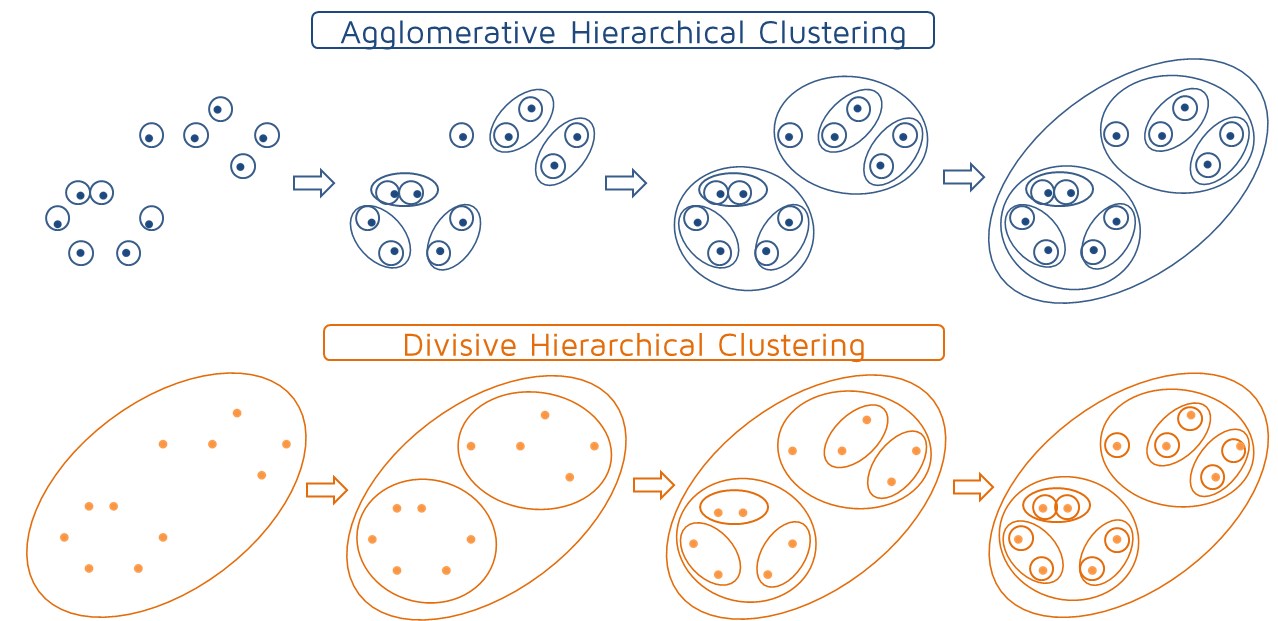

それではコードを確認していきましょう。

凝集型階層的クラスタリングはsklearn.cluster.AgglomerativeClusteringを使用します。以下の例はk-measのコードとほぼ同じでKmeansの代わりに、AgglomerativeClusteringを用いています。AgglomerativeClusteringの引数であるn_clustersは形成するクラスターの数、affinityは「ユークリッド」、「マンハッタン」、「コサイン」などの距離のパラメーター、linkageは観測セット間で使用する距離を意味しています。

url: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 0 2 0 2 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 2 2 0 0 1 1 2 0 0 0 0 2 0 0 0 2 0 0 1 1 2 0 0 0 0 1 2 2 1 1
 2 2 0 0 0 2 0 1 2 0 0 0 2 0 0 2 0 2 2 2 0 1 0 0 0 1 2 2 0 2]


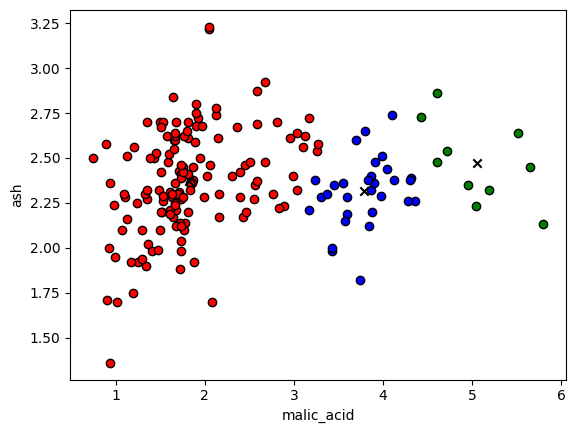

In [2]:
## 必要なライブラリーのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#データセットのためのライブラリ
from sklearn.datasets import load_wine
#凝集型階層的クラスタリング
from sklearn.cluster import AgglomerativeClustering

# データセットの読み込み
wine = load_wine()

X = wine.data[:,[1,2]]

#クラスタリング実行
ac = AgglomerativeClustering(n_clusters=3 ,affinity='euclidean', linkage='complete')
y_ac = ac.fit_predict(X)
print(y_ac)

#クラスタ番号0の散布図
plt.scatter(X[y_ac==0,0],X[y_ac==0,1],c='r',edgecolor='k', label='1')

#クラスタ番号0の中心
plt.scatter(np.mean(X[y_ac==0,0]),np.mean(X[y_ac==0,1]),c='k',marker='x')

#クラスタ番号1の散布図
plt.scatter(X[y_ac==1,0],X[y_ac==1,1],c='g',edgecolor='k', label='2')

#クラスタ番号1の中心
plt.scatter(np.mean(X[y_ac==1,0]),np.mean(X[y_ac==1,1]),c='k',marker='x')

#クラスタ番号2の散布図
plt.scatter(X[y_ac==2,0],X[y_ac==2,1],c='b',edgecolor='k', label='3')

#クラスタ番号2の中心
plt.scatter(np.mean(X[y_ac==2,0]),np.mean(X[y_ac==2,1]),c='k',marker='x')

plt.xlabel('malic_acid')
plt.ylabel('ash')
plt.show()

# 出力結果は以下の様になっています。各データにクラスタ番号が割り振られます。
# 今回は3つのクラスタに分けたので0、1、2の番号になっています。各クラスタ番号をグラフ化すると以下の図の結果となります。
# なお、×は各クラスタの中心を表しています